<a href="https://colab.research.google.com/github/baharsevinti/Machine-Learning-Diabet/blob/main/2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En iyi K değeri: 18 - 0.7579612322602977
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       151
           1       0.62      0.45      0.52        80

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231



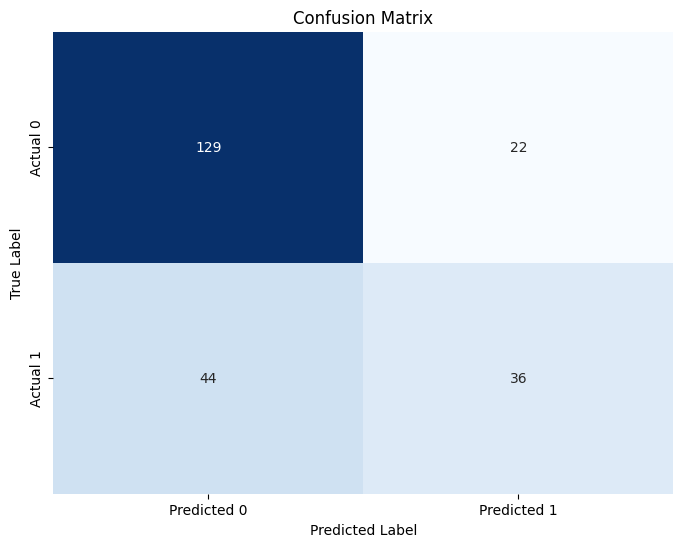

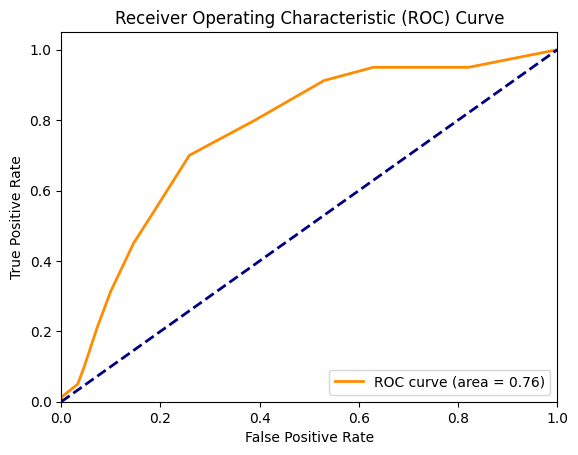

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Veri Setini Projete dahil etme
data = pd.read_csv("dataset.csv")

# Özellikler ve hedef değişkeni ayırma
X = data.drop(columns=['Class variable (0 or 1)'])  # Bağımsız değişkenler
y = data['Class variable (0 or 1)']  # Hedef değişken

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Min-Max normalizasyonu için scaler oluşturma ve uygulama
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# K değerlerini belirleme
k_values = range(1, 100)
best_k = None
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalized, y_train, cv=5, scoring='accuracy')
    accuracy = np.mean(scores)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"En iyi K değeri: {best_k} - {best_accuracy}")

# En iyi K değeriyle K-en yakın komşuluk sınıflandırıcısını eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_normalized, y_train)

# Test seti üzerinde modeli değerlendirme
y_pred = best_knn.predict(X_test_normalized)

# Sınıflandırma raporu
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Modelin tahminlerini hesaplama
y_pred = best_knn.predict(X_test_normalized)

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\n")
from sklearn.metrics import roc_curve, auc

# Sınıflandırıcının karar fonksiyonunu kullanarak ROC eğrisini çıkarma
y_scores = best_knn.predict_proba(X_test_normalized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
